# Template Notebook

## Setup

### Standard library imports

In [2]:
%load_ext autoreload

In [3]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [4]:
%autoreload 2

import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from source.spea_optimizer import SPEAOptimizer

In [5]:
sns.set()

In [6]:
def schaffer_function(x):  # soruce: https://www.researchgate.net/publication/2446107_A_Multiobjective_Evolutionary_Algorithm_The_Study_Cases
    return [x**2, (x - 2)**2]

In [7]:
print(SPEAOptimizer.__init__.__doc__)


        Magic init method for more information see:
            >>> print(SPEAOptimizer.__doc__)
        


In [8]:
optimzier = SPEAOptimizer(
    schaffer_function,
    n_dim=1,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="affinity_propagation"
)

In [9]:
history = optimzier.optimize(
    generations=100,
    population_size=100,
    crossover_rate=0.8,
    mutation_rate=0.4,
    reducing_period=1,
    search_range=((-10, 10),),
    mutation_strength=1,
    clustering_parameters={"max_iter": 50},
    silent=False,
    logging=False,
)

100%|██████████| 100/100 [00:02<00:00, 45.60it/s]


In [10]:
pareto_front = optimzier.pareto_front(n_solutions=10)

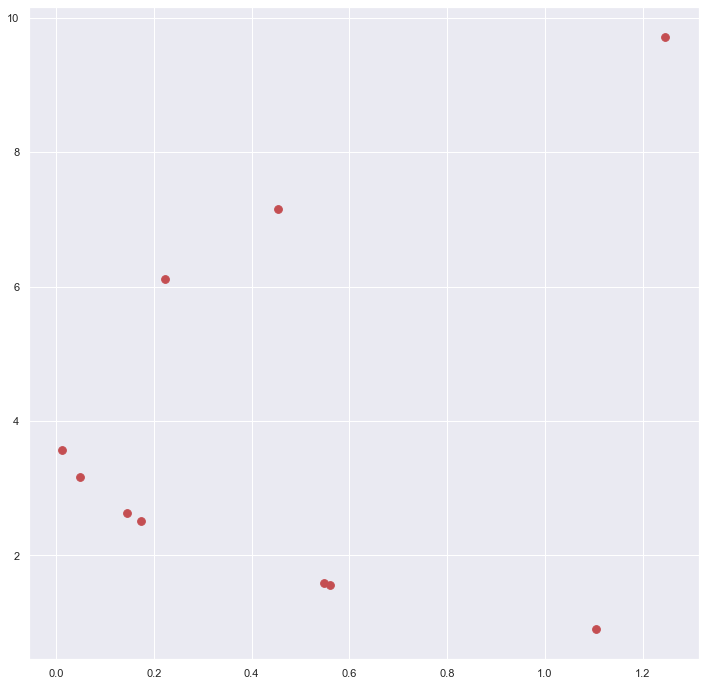

In [11]:
plt.figure(figsize=[12, 12])

values = np.apply_along_axis(schaffer_function, 0, pareto_front)
plt.scatter(values[0, :], values[1, :], c="r", s=60)

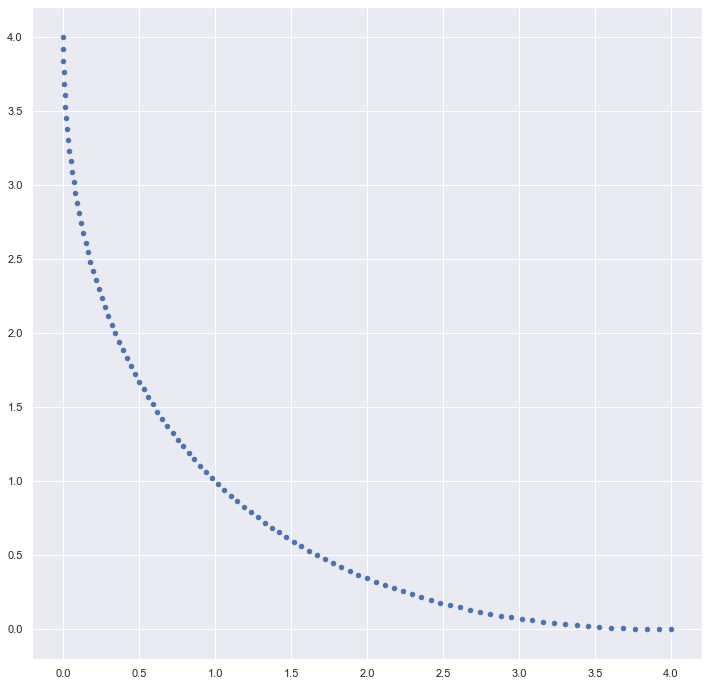

In [12]:
plt.figure(figsize=[12, 12])

t = np.linspace(0, 2, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)

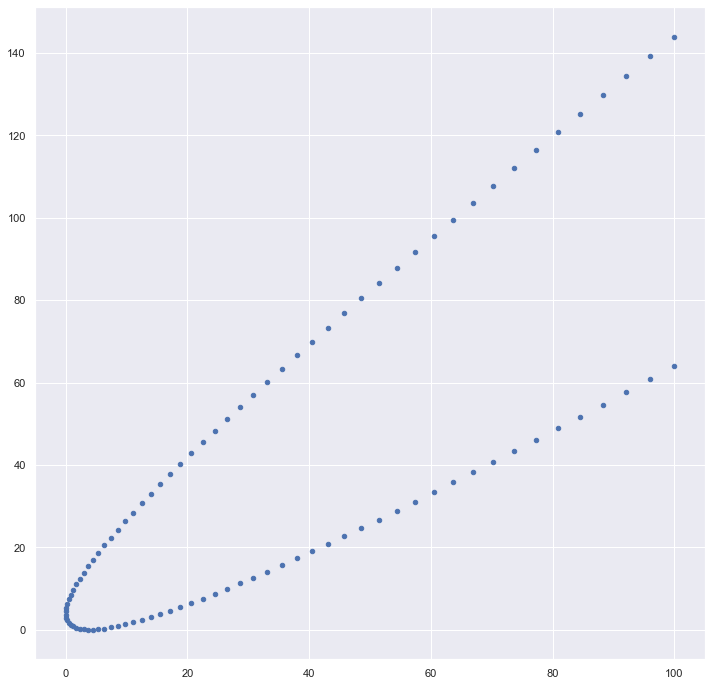

In [13]:
plt.figure(figsize=[12, 12])

t = np.linspace(-10, 10, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)